In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [3]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [4]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
179,LILIANE,0,88064,180,F
190,LURDES,0,83288,191,F
58,ALESSANDRA,0,242273,59,F
119,IRENE,0,136808,120,F
140,NEUZA,0,114541,141,F


In [5]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
121,ADEMIR,0,122923,122,M
122,ADAO,0,121982,123,M
193,KAUAN,0,68526,194,M
9,MARCOS,0,1101126,10,M
73,MARCO,0,207244,74,M


In [6]:
print('Quantidade de nomes: {}'.format(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [7]:
frames = [nomes_f, nomes_m]

In [8]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
57,DAIANE
37,ROSANGELA
154,SIDNEI
184,MARILIA
192,ZILDA


In [9]:
import numpy as np
np.random.seed(123)

In [10]:
total_alunos = len(nomes)
total_alunos

400

In [11]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [12]:
nomes

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
...,...,...
195,WALTER,231
196,ARLINDO,99
197,MICHAEL,323
198,ALVARO,383


In [13]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [14]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio,email
46,FABIANA,358,@servicodoemail.com,fabiana@servicodoemail.com
38,DIEGO,294,@dominiodoemail.com.br,diego@dominiodoemail.com.br
136,NILTON,271,@dominiodoemail.com.br,nilton@dominiodoemail.com.br
119,MOISES,4,@servicodoemail.com,moises@servicodoemail.com
101,GISELE,298,@servicodoemail.com,gisele@servicodoemail.com


In [16]:
!pip3 install html5lib
!pip3 install lxml

In [17]:
import html5lib

In [18]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [19]:
cursos = cursos[0]

In [20]:
type(cursos)

pandas.core.frame.DataFrame

In [21]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [22]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [23]:
cursos['id'] = cursos.index + 1

In [24]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [25]:
cursos = cursos.set_index('id')

In [26]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [33]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos)* 1.5).astype(int)

In [34]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
167,ANGELO,85,@servicodoemail.com,angelo@servicodoemail.com,4
150,GIOVANA,176,@dominiodoemail.com.br,giovana@dominiodoemail.com.br,2
134,ALBERTO,245,@servicodoemail.com,alberto@servicodoemail.com,6
155,EMANUEL,351,@dominiodoemail.com.br,emanuel@dominiodoemail.com.br,2
151,SEVERINA,5,@servicodoemail.com,severina@servicodoemail.com,1


In [35]:
nomes.matriculas.describe()

count    400.000000
mean       2.152500
std        1.586043
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [36]:
import seaborn as sns

C:\Users\gusta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

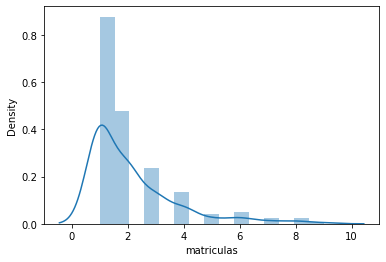

In [37]:
sns.distplot(nomes.matriculas)

In [38]:
nomes.matriculas.value_counts()

1    187
2    102
3     50
4     29
6     11
5      9
8      5
7      5
9      2
Name: matriculas, dtype: int64

In [39]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x) 

In [40]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [41]:
matriculas

,id_aluno,id_curso
0,235,7
1,235,7
2,43,2
3,304,18
4,304,7
...,...,...
856,383,11
857,383,2
858,366,16
859,366,15


In [43]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,25,Lógica de programação
2,80,Java para Web
3,13,C# para Web
4,60,Ruby on Rails
5,42,Cursos de Python
6,23,PHP com MySql
7,51,.NET para web
8,65,Novas integrações com Java
9,28,TDD com Java


In [44]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [45]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,25,Lógica de programação
2,80,Java para Web
3,13,C# para Web
4,60,Ruby on Rails
5,42,Cursos de Python
6,23,PHP com MySql
7,51,.NET para web
8,65,Novas integrações com Java
9,28,TDD com Java


In [46]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,25,Lógica de programação
2,80,Java para Web
3,13,C# para Web


In [47]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [48]:
matriculas_json = matriculas_por_curso.to_json()

In [49]:
matriculas_json

'{"quantidade_de_alunos":{"1":25,"2":80,"3":13,"4":60,"5":42,"6":23,"7":51,"8":65,"9":28,"10":60,"11":10,"12":14,"13":46,"14":59,"15":14,"16":60,"17":33,"18":56,"19":55,"20":67},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [50]:
matriculas_html = matriculas_por_curso.to_html()

In [52]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>25</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>80</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>13</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>60</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>42</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>23</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>51</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>65</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>28</td>


In [53]:
!pip install sqlalchemy

In [54]:
from sqlalchemy import create_engine, MetaData, Table, inspect


In [56]:
engine = create_engine('sqlite:///:memory:')

In [57]:
engine

Engine(sqlite:///:memory:)

In [58]:
type(engine)

sqlalchemy.engine.base.Engine

In [59]:
matriculas_por_curso.to_sql('matriculas', engine)

20

In [61]:
inspector = inspect(engine)

In [62]:
print(inspector.get_table_names())

['matriculas']


In [63]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [64]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,3,13,C# para Web
1,11,10,Preparatório para certificação Java
2,12,14,Hardware básico
3,15,14,Análise de dados


In [65]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,25
1,Java para Web,80
2,C# para Web,13
3,Ruby on Rails,60
4,Cursos de Python,42
5,PHP com MySql,23
6,.NET para web,51
7,Novas integrações com Java,65
8,TDD com Java,28
9,Código limpo com C#,60


In [66]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [69]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 60')

In [70]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
1,Java para Web,80
7,Novas integrações com Java,65
19,Orientação objetos com Java,67


In [71]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

3

In [74]:
inspector = inspect(engine)

In [75]:
print(inspector.get_table_names())

['matriculas', 'muitas_matriculas']


In [76]:
id_curso = 16
proxima_turma = matriculas.query("id_curso =={}".format(id_curso))
proxima_turma

,id_aluno,id_curso
9,310,16
18,92,16
43,10,16
70,172,16
74,284,16
79,262,16
91,268,16
113,276,16
116,281,16
119,14,16


In [77]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
1,16,SABRINA,@dominiodoemail.com.br,sabrina@dominiodoemail.com.br,2
6,16,CINTIA,@servicodoemail.com,cintia@servicodoemail.com,4
10,16,MARIANA,@servicodoemail.com,mariana@servicodoemail.com,2
14,16,SUELI,@dominiodoemail.com.br,sueli@dominiodoemail.com.br,2
19,16,VALMIR,@dominiodoemail.com.br,valmir@dominiodoemail.com.br,4
21,16,BIANCA,@dominiodoemail.com.br,bianca@dominiodoemail.com.br,4
50,16,LUCIANE,@servicodoemail.com,luciane@servicodoemail.com,5
50,16,LUCIANE,@servicodoemail.com,luciane@servicodoemail.com,5
62,16,EUNICE,@dominiodoemail.com.br,eunice@dominiodoemail.com.br,3


In [78]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
1        SABRINA
6         CINTIA
10       MARIANA
14         SUELI
19        VALMIR
21        BIANCA
50       LUCIANE
50       LUCIANE
62        EUNICE
63       LUCIANO
71         OSMAR
78      SEVERINO
92         ALINE
101       MANOEL
114         ERIC
131         DAVI
133      RODRIGO
150     DOMINGOS
154    CRISTIANO
155       CLEBER
157        LEILA
165       REBECA
171       ROSELI
171       ROSELI
172       ELIANE
184       JUNIOR
189       PAMELA
198       CICERO
205      ANTONIO
205      ANTONIO
220       SAMUEL
237        ZILDA
243    MARINALVA
251        MAURO
252     GILBERTO
254    CLAUDINEI
261      MARCELA
262        CARLA
268      MARLENE
274     VERONICA
276        LUZIA
278      SILVANA
281       REGINA
284       SIMONE
286       RAISSA
290       ROBSON
292       ANDREA
293        BRUNO
306      JAILSON
310      JULIANA
317    ALEXANDRA
319         INES
323      MICHAEL
326     EDMILSON
334       JANETE
341    ALEXANDRO
356      RONALDO
366      GEOVANE
371  

In [79]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
1,SABRINA
6,CINTIA
10,MARIANA
14,SUELI
19,VALMIR
21,BIANCA
50,LUCIANE
50,LUCIANE
62,EUNICE


In [80]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [81]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [82]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [83]:
proxima_turma

,nome
id_aluno,
1,SABRINA
6,CINTIA
10,MARIANA
14,SUELI
19,VALMIR
21,BIANCA
50,LUCIANE
50,LUCIANE
62,EUNICE


In [86]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [88]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
50,LUCIANE
14,SUELI
154,CRISTIANO
205,ANTONIO
326,EDMILSON


In [89]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)